In [1]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [22]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [2]:
kurly_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv", index_col=0)

In [10]:
kurly_data.head(1)

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,5136210,일반,박**,[바로생활] 아카시아꿀 스틱 10포,작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다. 의심이 많은...,2023.06.23,0,1,0.99409,"['박스', '2', '개', '10', '개', '씩', '20', '개', '네...","['작', '들', '있', '하', '많', '이', '하', '없', '먹', ..."


In [11]:
kurly_data['token_nouns_bareun'] = kurly_data['token_nouns_bareun'].apply(lambda x:eval(x))
kurly_data['token_verbs_bareun'] = kurly_data['token_verbs_bareun'].apply(lambda x:eval(x))

In [3]:
def kw_in_df(keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(kurly_data[kurly_data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return kurly_data[kurly_data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']

In [4]:
def kw_in_nouns(keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(kurly_data[kurly_data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return kurly_data[kurly_data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']

In [5]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

In [6]:
#워드클라우드 함수
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

In [7]:
def wc_kw(kw_option, keyword):
    if kw_option == 1: # 1은 용언 키워드, 2는 명사 키워드
        return wc_analysis(kurly_data[kurly_data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    elif kw_option == 2:
        return wc_analysis(kurly_data[kurly_data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'])
    else:
        return print('옵션 확인')

### 제주 꿀스틱 분석

In [20]:
kurly_data[kurly_data['ProductCode']==5026039]

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
727,5026039,화이트,이**,[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형),스틱형 꿀이 휴대 간편하고 먹기 좋더라고요~,2023.08.14,0,1,0.991909,"[스틱, 형, 꿀, 휴대]","[간편하, 먹, 좋]"
728,5026039,화이트,양**,[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형),먹기편리하네요 좋아요,2023.08.14,0,1,0.957615,[편리],"[먹, 하, 좋]"
729,5026039,일반,권**,[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형),그릭 요거트 위에 뿌려 먹으니 맛있어요. 밖에서 갖고 다닐수 있어 점심으로 좋아요.,2023.08.14,0,1,0.991633,"[그릭, 요거트, 위, 밖, 수, 점심]","[뿌리, 먹, 맛있, 갖, 다니, 있, 좋]"
730,5026039,일반,신**,[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형),다이어트를 위해 그릭요거트를 삿지만….속세의 입맛의 길들여진 탓에… 꿀을 넣지않으면...,2023.08.13,0,1,0.989600,"[다이어트, 요거트, 속세, 입맛, 탓, 꿀, 여성, 맛]","[위하, 삿지만, 길들이, 지, 넣, 않, 살, 못하, 되, 버, 잇]"
731,5026039,일반,채**,[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형),꿀 한통 사면 다 못 먹을때가 많은데 이건 좀 비싸긴해도 스틱혁이라 좋아요!,2023.08.13,0,1,0.983725,"[꿀, 통, 때, 이거, 스틱혁]","[사, 먹, 많, 비싸, 하, 이, 좋]"
...,...,...,...,...,...,...,...,...,...,...,...
6194,5026039,일반,김**,[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형),약먹는데 너무 써서 같이 먹으려고 샀는데 휴대하기 편하네요,2018.03.23,0,1,0.982833,"[약, 휴대]","[먹, 쓰, 먹, 사, 하, 편하]"
6195,5026039,퍼플,임**,[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형),맛은 좀 옅은 느낌? 향이 강하거나 하진 않아요 아침에 꺼내먹기 간편합니다,2018.03.22,0,1,0.960551,"[맛, 느낌, 향, 아침]","[옅, 강하, 하, 않, 꺼내, 먹, 간편하]"
6196,5026039,퍼플,조*,[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형),요거트에 넣어먹는데 짱이에요..b,2018.03.22,0,1,0.992305,"[요거트, 짱, b]","[넣어먹, 이]"
6197,5026039,퍼플,이**,[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형),경주행사때 스틱형꿀을 사서 먹어봤는데 판매하는곳을몰라 그냥 꿀병으로 사먹었는데 스틱...,2018.03.20,0,1,0.994210,"[경주, 행사, 때, 스틱, 형, 꿀, 판매, 곳, 꿀병, 스틱, 휴대, 야외, 사...","[사, 먹, 보, 하, 모르, 사, 먹, 이, 하, 좋, 하, 좋, 적당하, 흘리,..."


In [24]:
kurlyjeju_noun_frequency = frequency_analysis(kurly_data[kurly_data['ProductCode']==5026039]['token_nouns_bareun'], 500)

In [26]:
kurlyjeju_noun_frequency.to_excel(r'C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\frequency_excel\kurly_jeju_noun_frequency.xlsx')

In [31]:
kurly_data[kurly_data['ProductCode']==5026039]['sentiment_label'].value_counts()

sentiment_label
1    5188
0     284
Name: count, dtype: int64

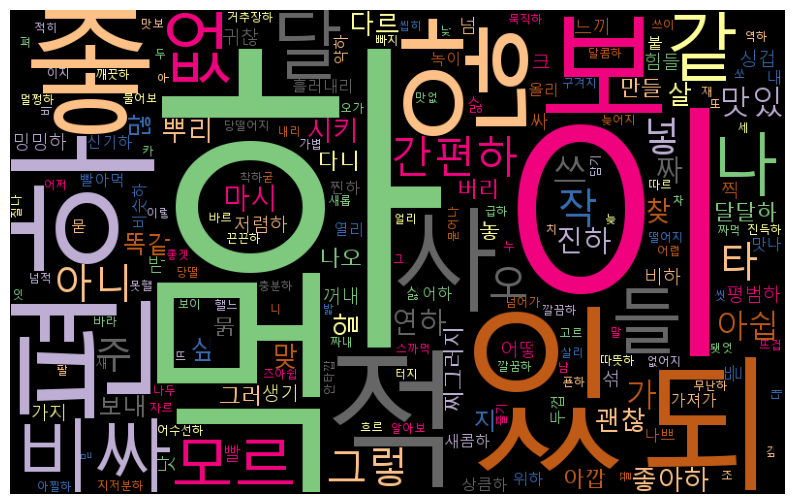

In [35]:
wc_analysis(kurly_data[(kurly_data['ProductCode']==5026039)&(kurly_data['sentiment_label']==0)]['token_verbs_bareun'])

In [92]:
kw_in_nouns('제주')

' 제주 ' 가 포함된 리뷰 총 69 건


776                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     사용하기 편하고 제주 꿀이라 더 좋아요 맛도 좋네요^^
795                                                                                                                                                                                                                                                                                                              

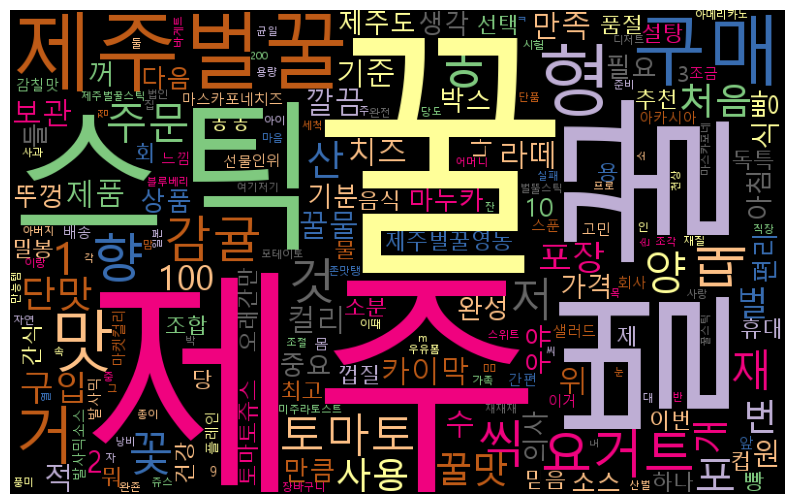

In [39]:
wc_kw(2,'제주')

In [ ]:
k